In [24]:
# Install required libraries if not already installed
!pip install requests
!pip install beautifulsoup4
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install pandas_datareader

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [26]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# Function to scrape headlines from Finviz
def scrape_finviz_headlines():
    url = 'https://finviz.com/news.ashx'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        headlines = soup.select('.nn-tab-link')

        headlines_list = []
        for headline in headlines:
            headline_text = headline.text.strip()
            headlines_list.append(headline_text)

        return headlines_list
    else:
        print(f'Failed to retrieve headlines. Status code: {response.status_code}')
        return None


In [28]:
# Function to fetch stock data using Yahoo Finance
def fetch_stock_data(symbol, start_date, end_date):
    try:
        stock_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error fetching stock data: {e}")
        return None


In [29]:
# Scraping headlines from Finviz
headlines = scrape_finviz_headlines()

In [30]:
# Displaying fetched headlines
if headlines:
    print(f'Number of headlines fetched: {len(headlines)}')
    for idx, headline in enumerate(headlines[:10], start=1):
        print(f'{idx}. {headline}')
else:
    print('No headlines fetched.')


Number of headlines fetched: 180
1. Nvidia's surge reveals a pitfall of passive investing
2. Why the Fed might need to 'get on with it' and cut rates
3. S&P, Nasdaq futures climb as Nvidia stretches rally
4. Honeywell Strikes $2 Billion Deal for Defense Business
5. Sasol Wins $342 Million Settlement After Pipeline-Fee Dispute
6. Abu Dhabi’s Biggest Fund Hires Ex-JD Executive in China
7. 8 stocks other than Microsoft, Apple and Nvidia that could be worth $4 trillion in three years
8. Stock Market Today: Futures Rise, Led by Nasdaq; Swiss Franc Weakens
9. It's Going to Cost More to Stay Cool This Summer
10. What's the Best Way to Protect Your Credit Score? Take Our Quiz


In [31]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join tokens back into text
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


In [32]:
# Example of preprocessing
print("\nExample of preprocessing:")
sample_text = headlines[0]
processed_text = preprocess_text(sample_text)
print(f'Original Text: {sample_text}')
print(f'Processed Text: {processed_text}')



Example of preprocessing:
Original Text: Nvidia's surge reveals a pitfall of passive investing
Processed Text: nvidia surg reveal pitfal passiv invest


In [33]:
# Dummy data labeling for demonstration
labels = ['positive', 'negative', 'neutral']
dummy_labels = np.random.choice(labels, len(headlines))


In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(headlines, dummy_labels, test_size=0.2, random_state=42)


In [35]:
# Machine Learning Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(preprocessor=preprocess_text)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])


In [36]:
# Training the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vect',
                 CountVectorizer(preprocessor=<function preprocess_text at 0x78505288a440>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [37]:
# Predictions
y_pred = pipeline.predict(X_test)


In [38]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [39]:
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



Evaluation Metrics:
Accuracy: 0.4444
Precision: 0.5060
Recall: 0.4444
F1-score: 0.3842


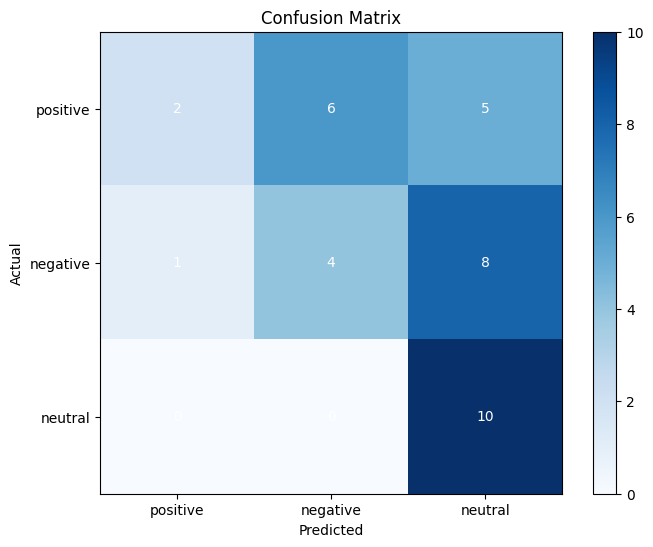

In [40]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()


In [41]:
# Portfolio simulation based on sentiment predictions
class Portfolio:
    def __init__(self, initial_cash):
        self.cash = initial_cash
        self.stock_units = 0
        self.initial_cash = initial_cash
        self.portfolio_value = self.cash
        self.trades = []

    def buy_stock(self, price):
        units_to_buy = int(self.cash / price)
        self.stock_units += units_to_buy
        self.cash -= units_to_buy * price
        self.portfolio_value = self.cash + self.stock_units * price
        self.trades.append(('BUY', units_to_buy, price))

    def sell_stock(self, price):
        self.cash += self.stock_units * price
        self.stock_units = 0
        self.portfolio_value = self.cash
        self.trades.append(('SELL', self.stock_units, price))

    def portfolio_performance(self):
        returns = (self.portfolio_value - self.initial_cash) / self.initial_cash
        return returns, len(self.trades), self.trades


In [42]:
# Example simulation based on sentiment prediction
portfolio = Portfolio(initial_cash=10000)
sentiments = pipeline.predict(headlines)


In [43]:
for i, sentiment in enumerate(sentiments):
    if sentiment == 'positive':
        # Fetching current stock price as an example (using AAPL)
        stock_data = fetch_stock_data('AAPL', '2023-01-01', '2024-01-01')
        if stock_data is not None and len(stock_data) > 0:
            current_price = stock_data['Adj Close'].iloc[-1]
            portfolio.buy_stock(price=current_price)
    elif sentiment == 'negative':
        # Fetching current stock price as an example (using AAPL)
        stock_data = fetch_stock_data('AAPL', '2023-01-01', '2024-01-01')
        if stock_data is not None and len(stock_data) > 0:
            current_price = stock_data['Adj Close'].iloc[-1]
            portfolio.sell_stock(price=current_price)

returns, num_trades, trades = portfolio.portfolio_performance()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [44]:
# Display portfolio performance
print(f"\nPortfolio Performance:")
print(f"Initial Cash: ${portfolio.initial_cash}")
print(f"Final Portfolio Value: ${portfolio.portfolio_value:.2f}")
print(f"Returns: {returns:.2%}")
print(f"Number of Trades Executed: {num_trades}")



Portfolio Performance:
Initial Cash: $10000
Final Portfolio Value: $10000.00
Returns: 0.00%
Number of Trades Executed: 120


In [45]:
# Display trades
print("\nTrades:")
for trade in trades:
    print(trade)



Trades:
('SELL', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('SELL', 0, 192.28463745117188)
('BUY', 52, 192.28463745117188)
('BUY', 0, 